Naive version of testing the "player pair" pattern's ATE on team's winning
1. come up with a causal graph in the materialized join graph (player-lineupplayer-player-lineupstats-game)
2. instantiate with tuples as nodes, and then do standard d-seperation / backdorr adjustment
3. generate the comparison between cajade pattern score vs ate

In [65]:
import pandas as pd
import dowhy
from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx

In [66]:
df = pd.read_csv('gsw_pairs.csv')

In [ ]:
player
player lineup
lineup game stats
game

In [83]:
df.head(10)

,player_name_1,player_name_2,mp,tm_poss,oppo_poss,pace,nfg,nfga,nfg_pct,n3p,...,nft,nfta,nft_pct,npts,game_date,lineup_id,home_id,outcome,opponent,win_rate
0,Dorell Wright,Chris Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
1,Brandon Rush,Jeremy Tyler,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
2,Brandon Rush,Dorell Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
3,Brandon Rush,Chris Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
4,Charles Jenkins,Brandon Rush,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
5,Charles Jenkins,Jeremy Tyler,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
6,Charles Jenkins,Dorell Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
7,Charles Jenkins,Chris Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
8,Jeremy Tyler,Dorell Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697
9,Jeremy Tyler,Chris Wright,1.7,3,4,100.8,-2,-3,-0.33,0,...,-2,-3,0.0,-6,2012-03-16,1,2,0,MIL,0.469697


In [68]:
list(df)

['player_name_1',
 'player_name_2',
 'mp',
 'tm_poss',
 'oppo_poss',
 'pace',
 'nfg',
 'nfga',
 'nfg_pct',
 'n3p',
 'n3pa',
 'n3p_pct',
 'nefg',
 'nft',
 'nfta',
 'nft_pct',
 'npts',
 'game_date',
 'lineup_id',
 'home_id',
 'outcome',
 'opponent',
 'win_rate']

In [69]:
cols_interest = [
 'mp',
 'tm_poss',
 'oppo_poss',
 'pace',
 'nfg',
 # 'nfga',
 'nfg_pct',
 'n3p',
 # 'n3pa',
 'n3p_pct',
 'nefg',
 'nft',
 # 'nfta',
 'nft_pct',
 'npts',
 'outcome',
 'win_rate']

In [70]:
df_smaller = df[cols_interest]
labels = [f'{col}' for i, col in enumerate(df_smaller.columns)]
data = df_smaller[cols_interest].to_numpy()


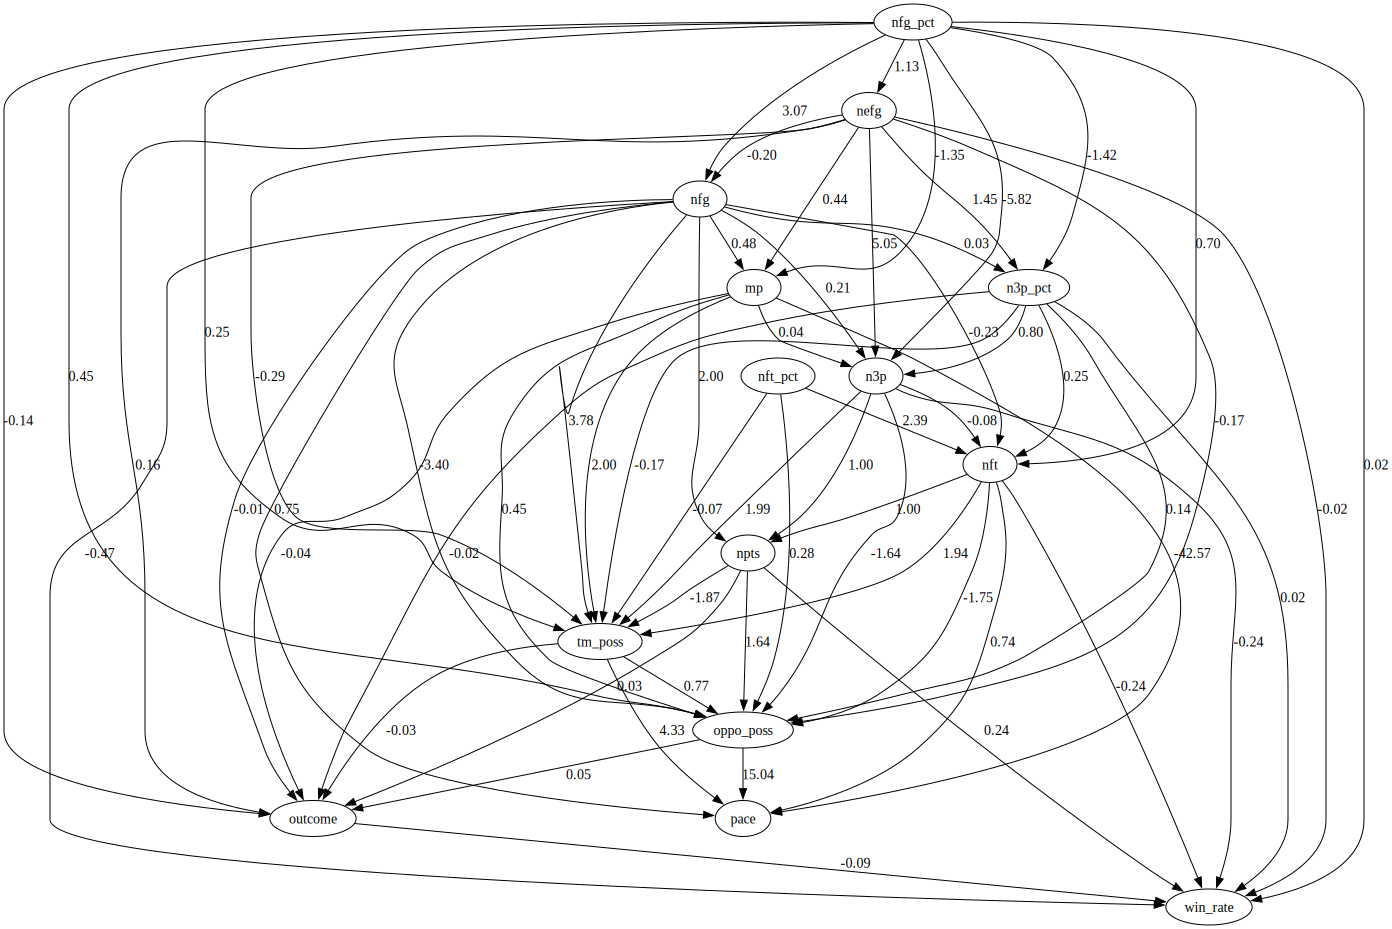

In [71]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM()
model.fit(data)

from causallearn.search.FCMBased.lingam.utils import make_dot
make_dot(model.adjacency_matrix_, labels=labels)

In [72]:
# focus on thompson and green



In [73]:
klay_and_draymond_df = df[(df['player_name_1']=='Klay Thompson') & (df['player_name_2']=='Draymond Green')]

In [74]:
klay_and_draymond_df['mp'] = klay_and_draymond_df['mp'].apply(lambda x: 1 if x > 19 else 0)


/var/folders/sl/1_4_3jg90p50ft92b5k6mgv00000gn/T/ipykernel_93036/4236576669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klay_and_draymond_df['mp'] = klay_and_draymond_df['mp'].apply(lambda x: 1 if x > 19 else 0)


In [75]:
klay_and_draymond_df

,player_name_1,player_name_2,mp,tm_poss,oppo_poss,pace,nfg,nfga,nfg_pct,n3p,...,nft,nfta,nft_pct,npts,game_date,lineup_id,home_id,outcome,opponent,win_rate
1034,Klay Thompson,Draymond Green,0,3,2,112.5,1,0,0.50,0,...,0,0,0.00,2,2014-03-16,2131,16,1,POR,0.658537
1036,Klay Thompson,Draymond Green,0,1,2,96.0,-1,-2,-0.33,0,...,0,0,0.00,-2,2014-04-11,2131,27,1,LAL,0.329268
1038,Klay Thompson,Draymond Green,0,2,2,87.3,-1,-1,0.00,0,...,2,2,0.00,0,2014-03-22,2131,2,0,SAS,0.756098
1183,Klay Thompson,Draymond Green,0,4,4,90.0,-2,-2,-0.27,-1,...,0,0,0.00,-5,2014-02-26,2149,25,0,CHI,0.585366
1185,Klay Thompson,Draymond Green,0,1,1,70.2,0,0,0.00,0,...,-2,-2,0.00,-2,2014-04-02,2149,10,0,SAS,0.756098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119333,Klay Thompson,Draymond Green,0,1,2,254.1,-1,-3,0.00,0,...,2,2,0.00,0,2018-04-03,115274,29,1,OKC,0.585366
119337,Klay Thompson,Draymond Green,0,0,1,360.0,-1,-1,0.00,0,...,0,0,0.00,-2,2018-04-07,115274,2,0,NOP,0.585366
119520,Klay Thompson,Draymond Green,0,1,1,90.0,1,1,0.00,0,...,-2,-2,0.00,0,2017-10-21,115288,21,0,MEM,0.268293
119560,Klay Thompson,Draymond Green,0,3,4,109.6,-1,0,-0.25,0,...,-1,-1,0.00,-3,2018-11-05,115292,2,1,MEM,0.402439


In [76]:
klay_and_draymond_df_smaller = klay_and_draymond_df[cols_interest]

In [77]:
klay_draymond_data = klay_and_draymond_df_smaller[cols_interest].to_numpy()


In [78]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d


def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.strip().replace('\n', ';').replace('\t','')
    graph = graph[:9] + graph[10:-2] + graph[-1] # Removing unnecessary characters from string
    return graph

In [79]:
klay_draymond_data.shape

In [82]:
graph_dot = make_graph(model.adjacency_matrix_, labels=labels)

data_df = pd.DataFrame(data=klay_draymond_data, columns=labels)

model_est=CausalModel(
        data = data_df,
        treatment='mp',
        outcome='outcome',
        graph=str_to_dot(graph_dot.source))

identified_estimand = model_est.identify_effect(proceed_when_unidentifiable=False)
print(identified_estimand)

estimate = model_est.estimate_effect(identified_estimand,
                                method_name="backdoor.linear_regression",
                                control_value=0,
                                treatment_value=1,
                                test_significance=True)
print("Causal Estimate is " + str(estimate.value))

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                               
─────(E[outcome|nefg,nfg_pct,nfg])
d[mp]                             
Estimand assumption 1, Unconfoundedness: If U→{mp} and U→outcome then P(outcome|mp,nefg,nfg_pct,nfg,U) = P(outcome|mp,nefg,nfg_pct,nfg)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['n3p_pct', 'nft_pct']}
Causal Estimate is 0.06748489611437014


/Users/chenjieli/.pyenv/versions/myenv/lib/python3.13/site-packages/dowhy/causal_estimator.py:258: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = self._data.groupby(effect_modifier_names)
/Users/chenjieli/.pyenv/versions/myenv/lib/python3.13/site-packages/dowhy/causal_estimators/regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/chenjieli/.pyenv/versions/myenv/lib/python3.13/site-packages/dowhy/causal_estimators/regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

In [81]:
len(data_df)